## Import Mudules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

In [2]:
data = pd.read_csv('train.csv', parse_dates=['Dates'])
print(data.shape)
data.head(3)

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414


In [5]:
test = pd.read_csv('test.csv', parse_dates=['Dates'])
print(test.shape)
test.head(3)

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212


## Data Exploration
* Testset don`t have Descript field and Resoultion field. So, I except two fields

In [6]:
## Exploration all fileds. Especially, What fields include "NaN value"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


### 1. Dates
* Exploration Dates by spliting Dates field to **"Year","Month","Day","Hour","Minute","Second"**

In [7]:
data['Dates-year'] = data['Dates'].dt.year
data['Dates-month'] = data['Dates'].dt.month
data['Dates-day'] = data['Dates'].dt.day
data['Dates-hour'] = data['Dates'].dt.hour
data['Dates-minute'] = data['Dates'].dt.minute
data['Dates-second'] = data['Dates'].dt.second

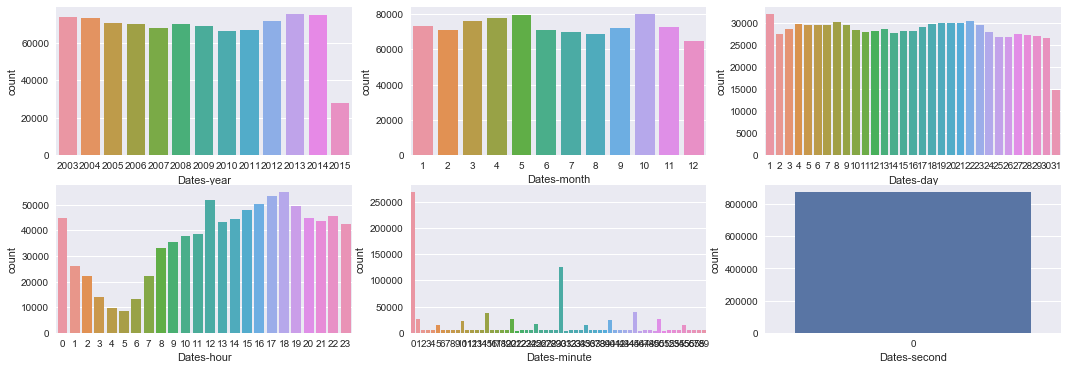

In [8]:
fig, ((axis1,axis2,axis3),(axis4,axis5,axis6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,6)

sns.countplot(data=data, x='Dates-year', ax=axis1)
sns.countplot(data=data, x='Dates-month', ax=axis2)
sns.countplot(data=data, x='Dates-day', ax=axis3)
sns.countplot(data=data, x='Dates-hour', ax=axis4)
sns.countplot(data=data, x='Dates-minute', ax=axis5)
sns.countplot(data=data, x='Dates-second', ax=axis6)

#### Lesson Learned 
1. Second field have no meaning
2. **minute field** have to consider
3. **Day field** : The reason why the number of 31 is small is only 31 days less.
4. **hour field ** : it can be confirmed that the amount of 1 ~ 7 o'clock is small.
5. **year field of 15** don`t have enough value

### 1-1 Dates-Hour / Dates-minute

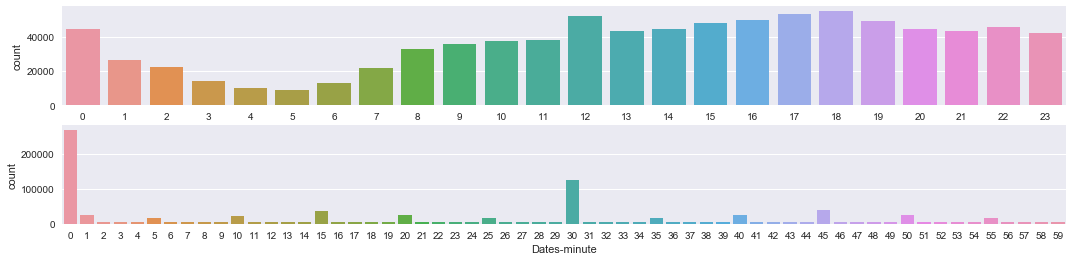

In [9]:
fig, (axis1,axis2) = plt.subplots(nrows=2, ncols=1, figsize=(18,4)) 
sns.countplot(data=data, x='Dates-hour', ax=axis1)
sns.countplot(data=data, x='Dates-minute', ax=axis2)

In [10]:
# Dates-hour exploration
data['Dates-hour'].value_counts()[-5:]

7    22048
3    14014
6    13133
4     9863
5     8637
Name: Dates-hour, dtype: int64

In [11]:
## 

def bin_data_minute(hour):
    if hour >=8 & hour ==0:
        return 'High_hour'
    else:
        return 'Low_hour'

In [12]:
data['bin_dates_hour'] = data['Dates-hour'].apply(bin_data_minute)

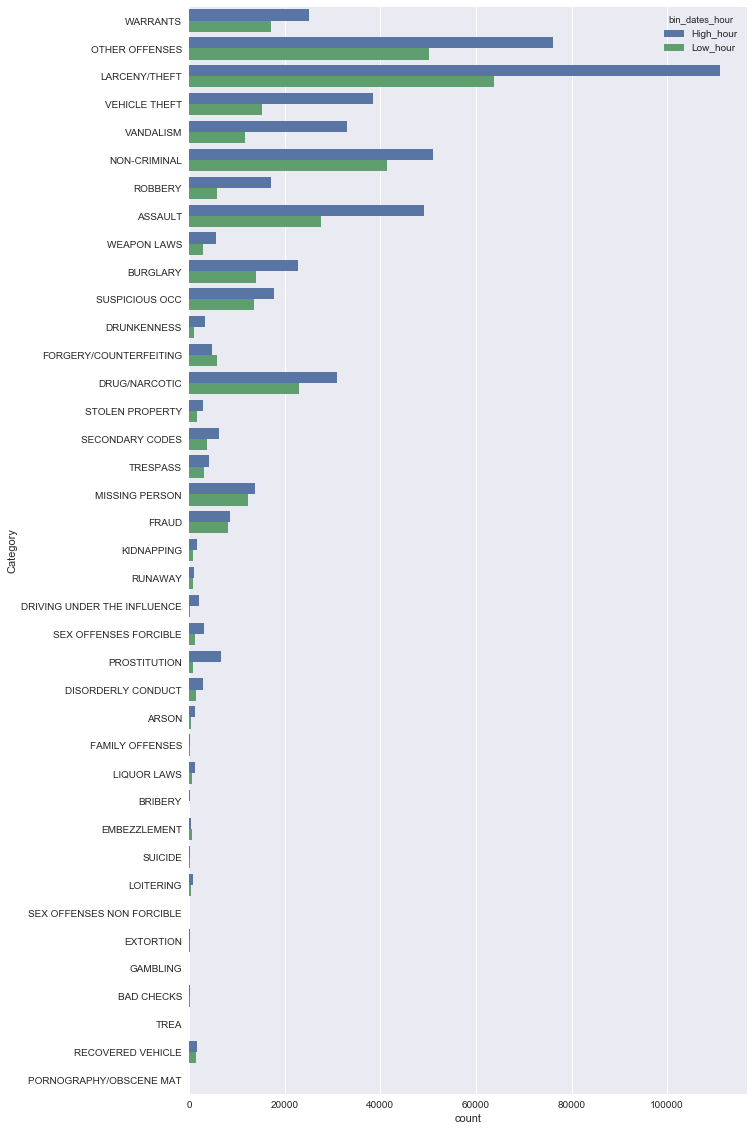

In [13]:
fig, axis1 = plt.subplots(figsize=(10,20))
sns.countplot(data=data, y='Category', hue='bin_dates_hour',ax=axis1)

#### Lesson Learned
* This means that you can evaluate the ** incidence ** of crime in this time zone 
    1. ** but it is meaningful as a variable to judge ** the type of crime ??
* ** Based on the tendency **, most of the visuals show similar patterns depending on the type of crime. Some crimes show different patterns, but how should ** pretreat ** these variables?

In [14]:
# Dates-minute exploration
data['Dates-minute'].value_counts()[:10]

0     268950
30    125173
45     40229
15     37904
20     26027
1      25859
50     25495
40     24668
10     22762
25     16178
Name: Dates-minute, dtype: int64

#### Lesson Learned
* **Dates-minute field** :  0/15/30/45, and so on. This may be enough to write 'roughly' in the process of writing a crime.
```python
=> Therefore, the data that can cause the error should be treated as others in the course of machine learning.
```

### 2. Address

In [15]:
# Number of addresses containing '/'
street_length = len(data[data['Address'].str.contains('/')])
print(street_length)

# Number of Block Addresses
print(len(data['Address'])- street_length)


260818
617231


In [16]:
def bin_address(address):
    if '/' in address:
        return 'Street'
    else:
        return 'Block'

In [17]:
data['Address_type'] = data['Address'].apply(bin_address)
data[['Address', 'Address_type']].head(5)

,Address,Address_type
0,OAK ST / LAGUNA ST,Street
1,OAK ST / LAGUNA ST,Street
2,VANNESS AV / GREENWICH ST,Street
3,1500 Block of LOMBARD ST,Block
4,100 Block of BRODERICK ST,Block


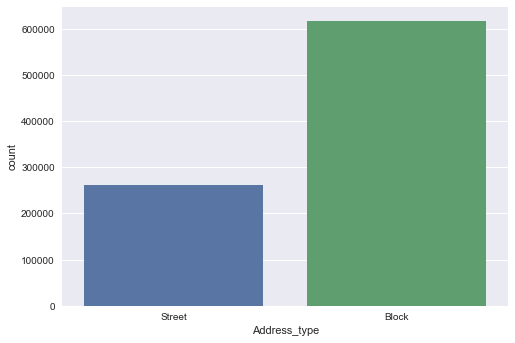

In [18]:
sns.countplot(data=data, x='Address_type')

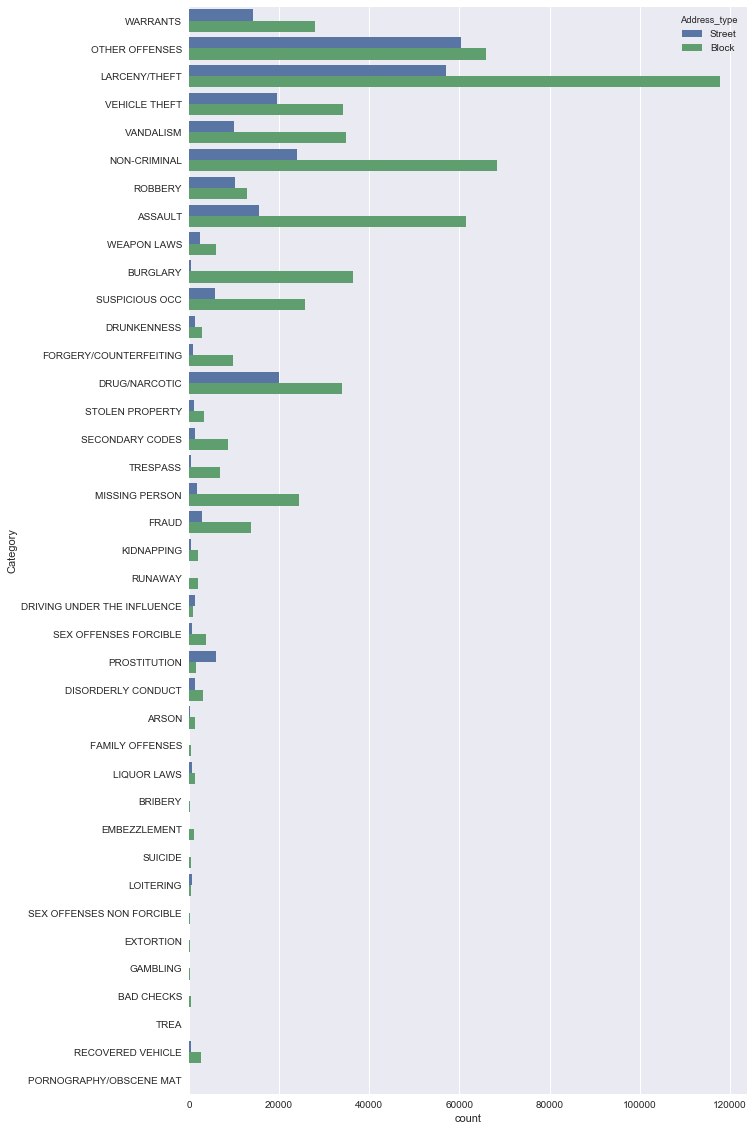

In [19]:
# countplot에서 hue와 x / y의 차이를 두면 더 많은 시각화를 할 수 있다.
fig, axis1 = plt.subplots(figsize=(10,20))
sns.countplot(data=data, y='Category', hue='Address_type', ax=axis1)

#### Lesson learned
* Depending on the type of address (2 : Street / Block) ** category **, there are various and different types.

### 2.1 Duplicated Address
* data preprocessing 에서 **data의 NAN(NULL)** 처리 와 더불어 **data duplication** 처리는 매우 중요한 issue이다.
* 특히, 주소같은 Field의 경우 **"순서가 바뀐 값"** 이 포함될 경우가 있다.
* 하지만 이처럼 **다량의 데이터**를 처리할 경우
```python
=> unique한 index만 추출 하여 돌리고 나머지는 Others처럼 무의미한 value로 처리해준다.
```

In [20]:
# 아래의 결과 처럼 주소의 순서만 잘못 기입했지 같은 위치에서 일어난 범죄가 실재로 존재한다.
# 따라서 이 데이터들은 하나의 주소로 만들어 줘야한다.
# 탐색결과 'BLOCK' 주소는 순서가 바뀐 주소가 없었다.
print(len(data[data['Address'] == 'OAK ST / LAGUNA ST']))
print(len(data[data['Address'] == 'LAGUNA ST / OAK ST']))

45
27


In [21]:
# Street 주소의 unique한 값만 추출
crossload = data[data['Address'].str.contains('/')]['Address'].unique()
print('crossload의 개수 {0} 개'.format(len(crossload)))

crossload의 개수 12278 개


In [22]:
# value_counts로 값을 세고 필요로 하는 값만 뽑아내는 방법 
# data[value_counts >= 100]을 하면 안된다.
# value_counts()의 반환 객체는 Series이고 >= 같은 연산자를 적용하면 Series객체의 Boolen값을 반환한다. 따라서 같은 Series객체로 감싸줘야한다.
# value_counts()는 unique()의 역할도 한다고 할 수 있다.
topN_address_list = data['Address'].value_counts()
topN_address_list = topN_address_list[topN_address_list >=100]
topN_address_list = topN_address_list.index
print('topN criminal address count is',len(topN_address_list))


topN criminal address count is 1637


In [23]:
# Modeling 을 위해 100개이하의 index들은 모두 MOdel에서 신경쓰지 않도록 'Others'로 선언
data['Address_clean'] = data['Address']
data.loc[~data['Address'].isin(topN_address_list), "Address_clean"] = 'Others'

data[['Address','Address_clean']].head(5)

,Address,Address_clean
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others
2,VANNESS AV / GREENWICH ST,Others
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,Others


In [24]:
crossload = data[data['Address_clean'].str.contains('/')]
print(crossload.shape)
crossload['Address_clean'].head(3)

(107352, 18)


12        TURK ST / JONES ST
13    FILLMORE ST / GEARY BL
16        EDDY ST / JONES ST
Name: Address_clean, dtype: object

In [25]:
crossload_list = crossload['Address_clean'].unique()
print('Before Adjustment ST_Address length is {0}' .format(len(crossload_list)))

Before Adjustment ST_Address length is 477


In [26]:
from tqdm import tqdm

In [27]:
# 같은 종류의 street value를 어떻게 합칠지 확인하기

crossload_list[0].split('/')[1].strip() + " / " + crossload_list[0].split('/')[0].strip() 

'JONES ST / TURK ST'

In [28]:
# 같은 종류의 street value를 어떻게 합칠지 확인하기

crossload_list[0]

'TURK ST / JONES ST'

In [29]:
for address in tqdm(crossload_list):
    reverse_address = address.split('/')[1].strip() + " / " + address.split('/')[0].strip()
    data.loc[data['Address_clean'] == reverse_address, 'Address_clean'] = address
    

100%|████████████████████████████████████████| 477/477 [01:08<00:00,  6.84it/s]


In [30]:
crossload_list = data[data['Address_clean'].str.contains('/')]
crossload_list = crossload_list['Address_clean'].unique()
print('Final ST_Address length is {0}' .format(len(crossload_list)))

Final ST_Address length is 322


### 3. PdDistrict

In [31]:
data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second',
       'bin_dates_hour', 'Address_type', 'Address_clean'],
      dtype='object')

In [32]:
data[['Category','PdDistrict']]

,Category,PdDistrict
0,WARRANTS,NORTHERN
1,OTHER OFFENSES,NORTHERN
2,OTHER OFFENSES,NORTHERN
3,LARCENY/THEFT,NORTHERN
4,LARCENY/THEFT,PARK
5,LARCENY/THEFT,INGLESIDE
6,VEHICLE THEFT,INGLESIDE
7,VEHICLE THEFT,BAYVIEW
8,LARCENY/THEFT,RICHMOND
9,LARCENY/THEFT,CENTRAL


In [33]:
data['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

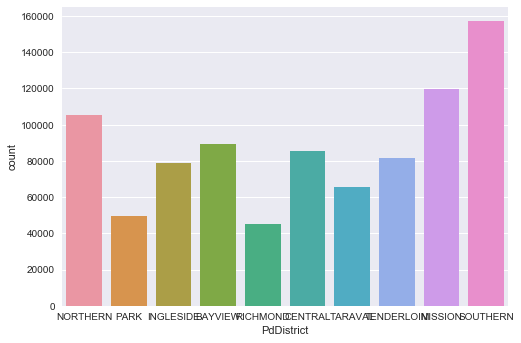

In [34]:
sns.countplot(data=data,  x='PdDistrict')

## Data PreProcessing(Feature Engineer)
1. Dates
2. PdDistrict
3. DayOfWeek 
4. Address
    * 범주형 자료는 일단 dummies화 시키셔 Encoding해보는것이 좋다.

### Reload Dataset

In [35]:
train = pd.read_csv('train.csv', parse_dates=['Dates'])
print(train.shape)
test = pd.read_csv('test.csv', parse_dates=['Dates'])
print(test.shape)

(878049, 9)
(884262, 7)


### 1. Dates

In [36]:
train['Dates-year'] = train['Dates'].dt.year
train['Dates-month'] = train['Dates'].dt.month
train['Dates-day'] = train['Dates'].dt.day
train['Dates-hour'] = train['Dates'].dt.hour
train['Dates-minute'] = train['Dates'].dt.minute
train['Dates-second'] = train['Dates'].dt.second

test['Dates-year'] = test['Dates'].dt.year
test['Dates-month'] = test['Dates'].dt.month
test['Dates-day'] = test['Dates'].dt.day
test['Dates-hour'] = test['Dates'].dt.hour
test['Dates-minute'] = test['Dates'].dt.minute
test['Dates-second'] = test['Dates'].dt.second


In [37]:
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second'],
      dtype='object')

In [38]:
print(train.shape)
train[['Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second']].head(3)
print(test.shape)
test[['Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second']].head(3)

(878049, 15)
(884262, 13)


,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015,5,10,23,59,0
1,2015,5,10,23,51,0
2,2015,5,10,23,50,0


### Dates-minute Encoding
* **Convert** 30 minutes to **0** becuase minute 30 is so high record that don`t have any meaning

In [39]:
train['Dates-minute_clean'] = train['Dates-minute']
test['Dates-minute_clean'] = test['Dates-minute']

train.loc[train['Dates-minute'] == 30, 'Dates-minute_clean'] = 0
train[train['Dates-minute'] == 30]

test.loc[test['Dates-minute'] == 30, 'Dates-minute_clean'] = 0
test[test['Dates-minute'] == 30]

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-minute_clean
6,6,2015-05-10 23:30:00,Sunday,INGLESIDE,100 Block of CHENERY ST,-122.425616,37.739351,2015,5,10,23,30,0,0
7,7,2015-05-10 23:30:00,Sunday,INGLESIDE,200 Block of BANKS ST,-122.412652,37.739750,2015,5,10,23,30,0,0
25,25,2015-05-10 21:30:00,Sunday,RICHMOND,200 Block of 11TH AV,-122.469907,37.783616,2015,5,10,21,30,0,0
26,26,2015-05-10 21:30:00,Sunday,NORTHERN,800 Block of FULTON ST,-122.431149,37.777698,2015,5,10,21,30,0,0
37,37,2015-05-10 20:30:00,Sunday,PARK,200 Block of WOODSIDE AV,-122.454240,37.745956,2015,5,10,20,30,0,0
38,38,2015-05-10 20:30:00,Sunday,TARAVAL,2100 Block of 15TH AV,-122.471614,37.747889,2015,5,10,20,30,0,0
39,39,2015-05-10 20:30:00,Sunday,TARAVAL,2200 Block of JUDAH ST,-122.486111,37.761244,2015,5,10,20,30,0,0
40,40,2015-05-10 20:30:00,Sunday,RICHMOND,500 Block of 21ST AV,-122.480173,37.777414,2015,5,10,20,30,0,0
41,41,2015-05-10 20:30:00,Sunday,TARAVAL,2200 Block of JUDAH ST,-122.486111,37.761244,2015,5,10,20,30,0,0
59,59,2015-05-10 19:30:00,Sunday,TARAVAL,2300 Block of 9TH AV,-122.467473,37.747055,2015,5,10,19,30,0,0


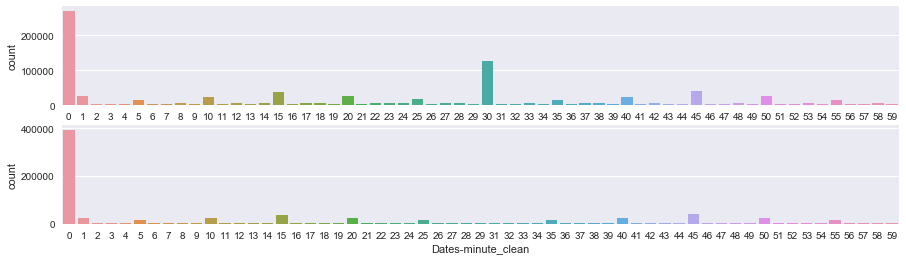

In [40]:
fig, (axis1, axis2) = plt.subplots(2,1, figsize=(15,4))

sns.countplot(data=data, x='Dates-minute', ax=axis1)
sns.countplot(data=train, x='Dates-minute_clean', ax=axis2)

### 2. PdDistrict

In [43]:
PdDistrict_dummies_train = pd.get_dummies(train['PdDistrict'], prefix='PdDistrict')
print(PdDistrict_dummies_train.shape)
PdDistrict_dummies_train.head(3)
PdDistrict_dummies_test = pd.get_dummies(test['PdDistrict'], prefix='PdDistrict')
print(PdDistrict_dummies_train.shape)
PdDistrict_dummies_train.head(3)

(878049, 10)
(878049, 10)


,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0


In [44]:
train2 = train.copy()
test2 = test.copy()

In [45]:
train = pd.concat([train2, PdDistrict_dummies_train], axis=1)
test = pd.concat([test2, PdDistrict_dummies_test], axis=1)

PdDistrict_columns_list = list(PdDistrict_dummies_train.columns)


print("The List of PdDistrict columns = {0}".format(PdDistrict_columns_list))

print(train.shape)
print(test.shape)

train[["PdDistrict"] + PdDistrict_columns_list].head()

The List of PdDistrict columns = ['PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL', 'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN', 'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN', 'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN']
(878049, 26)
(884262, 24)


,PdDistrict,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,NORTHERN,0,0,0,0,1,0,0,0,0,0
1,NORTHERN,0,0,0,0,1,0,0,0,0,0
2,NORTHERN,0,0,0,0,1,0,0,0,0,0
3,NORTHERN,0,0,0,0,1,0,0,0,0,0
4,PARK,0,0,0,0,0,1,0,0,0,0


### 3. DayOfWeek

In [46]:
DayOfWeek_dummies_train = pd.get_dummies(train['DayOfWeek'], prefix='DayOfWeek')
print(DayOfWeek_dummies_train.shape)
DayOfWeek_dummies_test = pd.get_dummies(test['DayOfWeek'], prefix='DayOfWeek')
print(DayOfWeek_dummies_test.shape)
DayOfWeek_dummies_train.head(3)

(878049, 7)
(884262, 7)


,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1


In [47]:
train2 = train.copy()
test2 = test.copy()

In [48]:
train = pd.concat([train2, DayOfWeek_dummies_train], axis=1)
test = pd.concat([test2, DayOfWeek_dummies_test], axis=1)

DayOfWeek_columns_list = list(DayOfWeek_dummies_train.columns)


print("The List of DayOfWeek columns = {0}".format(DayOfWeek_columns_list))

print(train.shape)
print(test.shape)

train[["DayOfWeek"] + DayOfWeek_columns_list].head()

The List of DayOfWeek columns = ['DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday']
(878049, 33)
(884262, 31)


,DayOfWeek,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday
0,Wednesday,0,0,0,0,0,0,1
1,Wednesday,0,0,0,0,0,0,1
2,Wednesday,0,0,0,0,0,0,1
3,Wednesday,0,0,0,0,0,0,1
4,Wednesday,0,0,0,0,0,0,1


### 4.Address

In [49]:
train["Address_CrossRoad"] = train["Address"].str.contains("/")
test["Address_CrossRoad"] = test["Address"].str.contains("/")

print(train.shape)
print(test.shape)

train[["Address", "Address_CrossRoad"]].head()

(878049, 34)
(884262, 32)


,Address,Address_CrossRoad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [50]:
major_address_list = train["Address"].value_counts()
major_address_list = major_address_list[major_address_list >= 100]
major_address_list = major_address_list.index

print("The number of major address = {0}".format(len(major_address_list)))
major_address_list[:5]

The number of major address = 1637


Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST'],
      dtype='object')

In [51]:
train["Address_clean"] = train["Address"]
test["Address_clean"] = test["Address"]

train.loc[~train["Address"].isin(major_address_list), "Address_clean"] = "Others"
test.loc[~test["Address"].isin(major_address_list), "Address_clean"] = "Others"

print(train.shape)
print(test.shape)

train[["Address", "Address_clean"]].head()

(878049, 35)
(884262, 33)


,Address,Address_clean
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others
2,VANNESS AV / GREENWICH ST,Others
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,Others


In [52]:
crossroad = train[train["Address_clean"].str.contains("/")]

print(crossroad.shape)
crossroad[["Address", "Address_clean", "Category"]].head()

(107352, 35)


,Address,Address_clean,Category
12,TURK ST / JONES ST,TURK ST / JONES ST,VANDALISM
13,FILLMORE ST / GEARY BL,FILLMORE ST / GEARY BL,LARCENY/THEFT
16,EDDY ST / JONES ST,EDDY ST / JONES ST,ROBBERY
57,HARRISON ST / 10TH ST,HARRISON ST / 10TH ST,LARCENY/THEFT
58,GEARY BL / LAGUNA ST,GEARY BL / LAGUNA ST,LARCENY/THEFT


In [53]:
crossroad_list = crossroad["Address_clean"].unique()

print("The number of cross road (Before) = {0}".format(len(crossroad_list)))
crossroad_list[:5]

The number of cross road (Before) = 477


array(['TURK ST / JONES ST', 'FILLMORE ST / GEARY BL',
       'EDDY ST / JONES ST', 'HARRISON ST / 10TH ST',
       'GEARY BL / LAGUNA ST'], dtype=object)

In [54]:
from tqdm import tqdm

for address in tqdm(crossroad_list):
    address_split = address.split("/")
    reverse_address = address_split[1].strip() + " / " + address_split[0].strip()
    
    train.loc[train["Address_clean"] == reverse_address, "Address_clean"] = address
    test.loc[test["Address_clean"] == reverse_address, "Address_clean"] = address

100%|████████████████████████████████████████| 477/477 [02:18<00:00,  3.22it/s]


In [55]:
print(len(train[train['Address_clean'] == 'JONES ST / TURK ST']))
print(len(train[train['Address_clean'] == 'TURK ST / JONES ST']))

857
0


## SCORE

In [56]:
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second',
       'Dates-minute_clean', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL',
       'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
       'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
       'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'Address_CrossRoad', 'Address_clean'],
      dtype='object')

In [57]:
feature_names = ['X', 'Y','Address_CrossRoad']
feature_names = feature_names + ['Dates-minute_clean','Dates-hour']
feature_names = feature_names + PdDistrict_columns_list
label_name = 'Category'
X_train = train[feature_names]
y_train = train[label_name]
print(X_train.shape)
print(y_train.shape)
X_train.head(3)

(878049, 15)
(878049,)


,X,Y,Address_CrossRoad,Dates-minute_clean,Dates-hour,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.425892,37.774599,True,53,23,0,0,0,0,1,0,0,0,0,0
1,-122.425892,37.774599,True,53,23,0,0,0,0,1,0,0,0,0,0
2,-122.424363,37.800414,True,33,23,0,0,0,0,1,0,0,0,0,0


In [58]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head(3)

(884262, 15)


,X,Y,Address_CrossRoad,Dates-minute_clean,Dates-hour,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,-122.399588,37.735051,False,59,23,1,0,0,0,0,0,0,0,0,0
1,-122.391523,37.732432,True,51,23,1,0,0,0,0,0,0,0,0,0
2,-122.426002,37.792212,False,50,23,0,0,0,0,1,0,0,0,0,0


### Concatenate current features and the address (use CSR matrix)
* 많은 Field를 get_dummies 같은 함수로 연결시킨다..? 그리고 이것을 modeling한다??
* 아마 computer 연산이 매우매우매우 **오래**걸릴것이다.
#### 따라서 np.Matrix형태로 dataFrame의 값들을 vectorizing 해줘야한다!!

```python
Sklearn.preprocessing -> LabelEncoder 
 |  It can also be used to transform non-numerical labels (as long as they are
 |  hashable and comparable) to numerical labels.
```

In [59]:
# LabelEncoder convert Categorical variable to Numerical variable with 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_encoder.fit(train["Address_clean"])
# fit을 한다는 것은 해당 Field를 normalize 하는 것이다.
# 예를들어, 중복되는 index들을 합쳐 기준을 세운다.

train["Address_clean_encode"] = label_encoder.transform(train["Address_clean"])
test["Address_clean_encode"] = label_encoder.transform(test["Address_clean"])
# 세운 기준을 통해 transform(숫자로 변경) 시킨다.


print(train.shape)
print(test.shape)

train[["Address", "Address_clean", "Address_clean_encode"]].head()

(878049, 36)
(884262, 34)


,Address,Address_clean,Address_clean_encode
0,OAK ST / LAGUNA ST,Others,1416
1,OAK ST / LAGUNA ST,Others,1416
2,VANNESS AV / GREENWICH ST,Others,1416
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST,396
4,100 Block of BRODERICK ST,Others,1416


In [61]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

one_hot_encoder.fit(train[["Address_clean_encode"]])

train_address = one_hot_encoder.transform(train[["Address_clean_encode"]])
test_address = one_hot_encoder.transform(test[["Address_clean_encode"]])

print(train_address.shape)
print(test_address.shape)

train_address

(878049, 1483)
(884262, 1483)


<878049x1483 sparse matrix of type '<class 'numpy.float64'>'
	with 878049 stored elements in Compressed Sparse Row format>

In [63]:
# hstack 은 array를 병합해주는 함수이다. 이때 병렬적으로 연결해주기 때문에 빠른 연산이 가능하다.

from scipy.sparse import hstack

X_train = hstack((X_train.astype(np.float32), train_address))
# np 함수는 dataFrame에 모든 요소에 빠른 함수를 적용시킨다.

print(X_train.shape)
X_train

(878049, 1498)


<878049x1498 sparse matrix of type '<class 'numpy.float64'>'
	with 5090124 stored elements in COOrdinate format>

In [66]:
from scipy.sparse import hstack

X_test = hstack((X_test.astype(np.float32), test_address))

print(X_test.shape)
X_test

(884262, 1498)


<884262x1498 sparse matrix of type '<class 'numpy.float64'>'
	with 5123302 stored elements in COOrdinate format>

## Evaluate Scoring

In [70]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

seed = 37

model = xgb.XGBClassifier(objective='multi:softprob',
                          n_estimators=45,
                          learning_rate=1.0,
                          max_depth=6,
                          max_delta_step=1,
                          nthread=-1,
                          seed=seed)

%time score = cross_val_score(model, X_train, y_train, scoring='neg_log_loss', cv=5).mean()
score = score * -1.0

print("Score = {0:.5f}".format(score))

c:\users\moon\anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\users\moon\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\users\moon\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
c:\users\moon\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:127: DeprecationWarning: Scoring method log_loss was rename

Wall time: 42min 1s
Score = 2.31673


## Save Model

In [72]:
import pickle 

%time model.fit(X_train, y_train)

pickle.dump(model, open("models/xgboost.p", "wb"))

Wall time: 10min 27s


In [73]:
model = pickle.load(open("models/xgboost.p", "rb"))
model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=1.0, max_delta_step=1, max_depth=6,
       min_child_weight=1, missing=nan, n_estimators=45, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=37, silent=True, subsample=1)

In [74]:
predictions = model.predict_proba(X_test)

predictions = predictions.astype(np.float32)

print(predictions.shape)
predictions[:1]

(884262, 39)


array([[  5.84399235e-03,   9.03711841e-02,   1.55535611e-06,
          2.42576261e-05,   2.01998986e-02,   1.84871349e-03,
          1.54558104e-03,   2.33043227e-02,   1.29607529e-03,
          5.74886973e-04,   4.29514184e-05,   2.08343743e-04,
          1.59377570e-03,   4.18615714e-03,   3.81085374e-06,
          6.69224479e-04,   1.52323321e-01,   8.73354904e-04,
          1.56053487e-04,   1.05052888e-02,   4.83834371e-02,
          8.69943276e-02,   3.73756734e-07,   1.41587909e-04,
          8.75006709e-03,   8.80134013e-03,   4.44322970e-04,
          1.56895779e-02,   1.08292699e-03,   1.20015545e-06,
          3.03184474e-03,   3.02519329e-04,   2.96736006e-02,
          1.10777491e-05,   3.56991030e-03,   8.45428035e-02,
          3.64943504e-01,   1.90116074e-02,   9.05122049e-03],
       [  2.84704671e-04,   2.97586713e-02,   8.55584631e-07,
          1.02901564e-03,   6.53797702e-04,   1.70827121e-03,
          4.41170204e-03,   1.03569746e-01,   6.75059762e-03,
       

In [75]:
submission = pd.read_csv("sampleSubmission.csv", index_col="Id")

for i, column in enumerate(submission.columns):
    submission[column] = predictions[:, i]

print(submission.shape)
submission.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Id,,,,,,,,,,,,,,,,,,,,,
0,0.005844,0.090371,1.555356e-06,0.000024,0.020200,0.001849,0.001546,0.023304,0.001296,0.000575,...,0.000001,0.003032,0.000303,0.029674,1.107775e-05,0.003570,0.084543,0.364944,0.019012,0.009051
1,0.000285,0.029759,8.555846e-07,0.001029,0.000654,0.001708,0.004412,0.103570,0.006751,0.000029,...,0.000005,0.003400,0.000004,0.021133,1.414563e-05,0.000418,0.012458,0.013644,0.313760,0.023556
2,0.001850,0.112002,2.910908e-05,0.000051,0.083034,0.005055,0.002539,0.022143,0.007271,0.000170,...,0.000001,0.007280,0.000469,0.035575,9.885230e-08,0.010571,0.089826,0.035116,0.022808,0.006981
3,0.002004,0.242351,1.171364e-04,0.000248,0.037183,0.008867,0.002326,0.023445,0.020975,0.000760,...,0.000026,0.006468,0.000036,0.041933,9.696505e-07,0.005100,0.066773,0.064593,0.026448,0.018770
4,0.002004,0.242351,1.171364e-04,0.000248,0.037183,0.008867,0.002326,0.023445,0.020975,0.000760,...,0.000026,0.006468,0.000036,0.041933,9.696505e-07,0.005100,0.066773,0.064593,0.026448,0.018770
